# **Import all python libraries**

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
sns.set()

# Import Dependencies
%matplotlib inline
   
# Start Python Imports
import math, time, random, datetime

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# **Collecting all relevant datasets**

In [2]:
# import train and set data
PATH = "./titanic_data/"

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

# **Exploratory Data Analysis**

Data Description

*Survived* 0 : No 1: Yes

pClass 1: First Class 2: Second Class 3: Third Class

Sibsp number of siblings/spouse on board

parch number of children/parents on board

embarked C: Cherbourg Q: Queenstown S: Southampton

In [3]:
train.describe()
#build in overview of data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# **Bar Chart for Categorical Features**

In [12]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    victim = train[train['Survived']==0][feature].value_counts()
    
    df = pd.DataFrame([survived, victim])
    df.index = ['Survived', 'Victim']
    df.plot(kind = 'bar',stacked=True, figsize=(10,10))

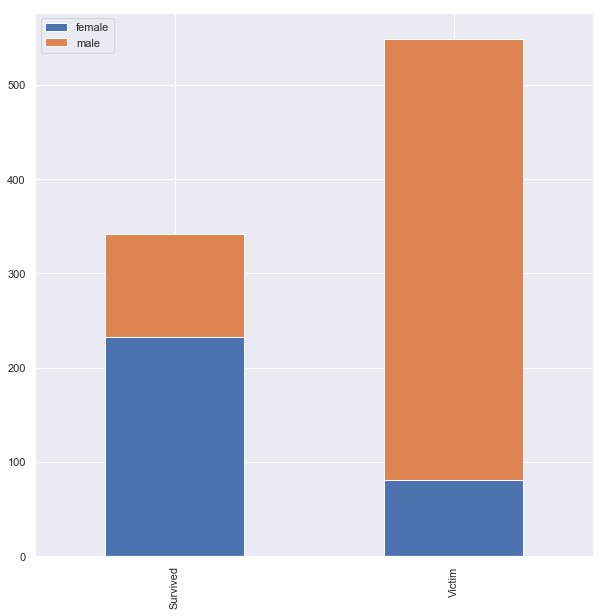

In [13]:
bar_chart('Sex')

*you were more likely to survive the sinking of the titanic if you were female*

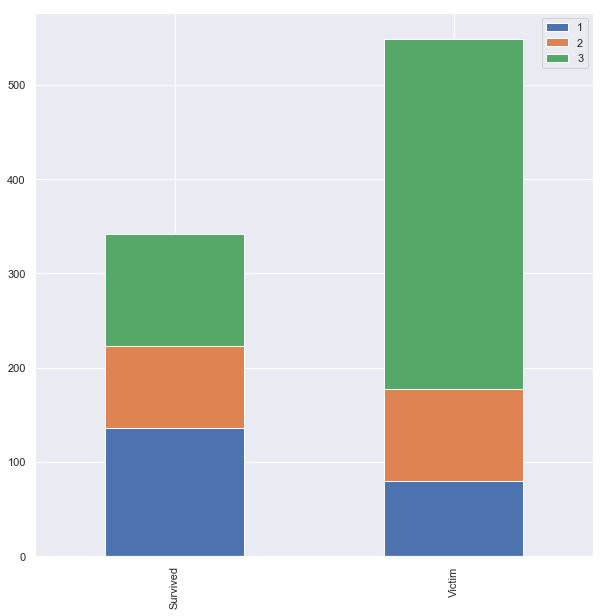

In [14]:
bar_chart('Pclass')

*you were more like to survive if you were from first class, it's an approximate 50/50 if you were second class and about 30% if you were from third class*

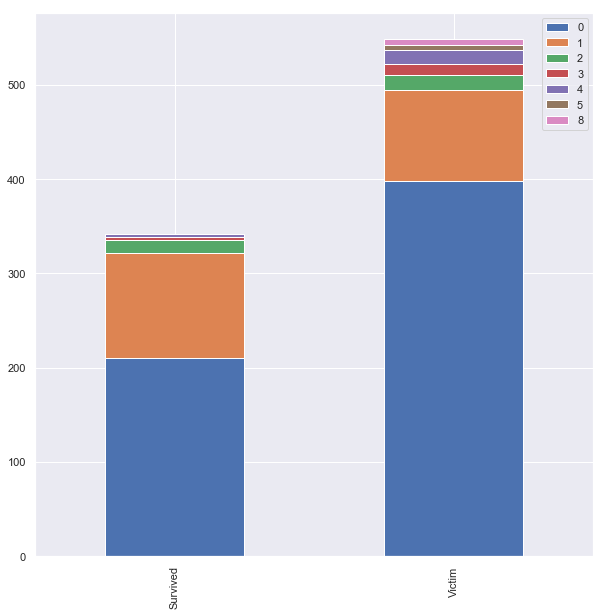

In [15]:
bar_chart('SibSp')

*most victims were solo travellers*

*then spouses - probably mainly men who were survived by their wives*

*if you had 2 or more numbers of siblings/spouse your chances of survival got significantly smaller*

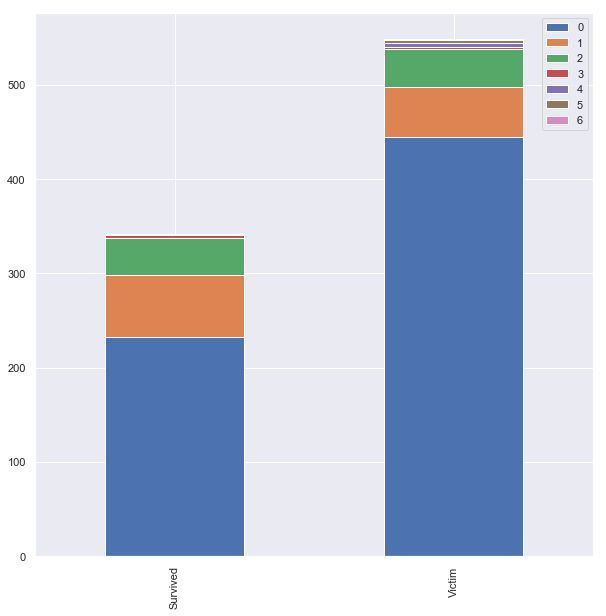

In [16]:
bar_chart('Parch')

Since most travellers were solo travellers without any relations your chances were about 50/50

If you had one child or parent your chances got better for survival

If you had two children or parents your chances were about 50/50

However, if you had 3 children/parents on board your chances got significantly lower of surviving

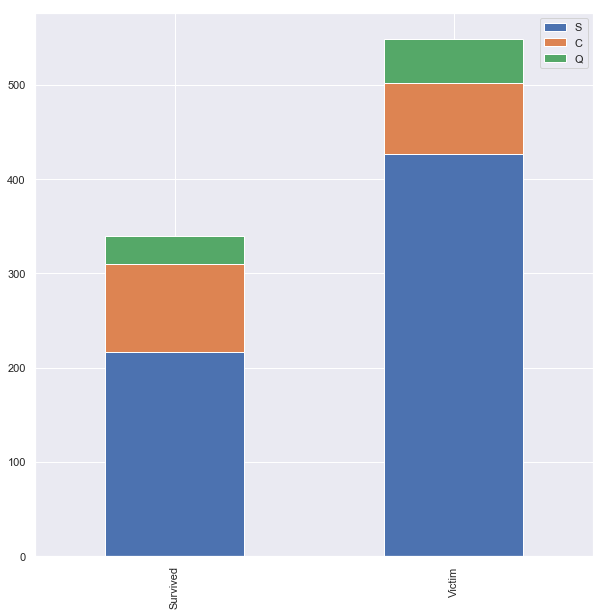

In [17]:
bar_chart('Embarked')

most passengers embarked at Southampton giving your chances of survival 50%

The worst port seems to Cherbourg then Queenstown

# Feature Engineering

Feature engineering is the process of using domain knowledge of the data to create features (feautre vectors) that make machine learning algorithms work.  Feature vector is an n-dimensional vector of numerical features that represent some object. 

Many algorithms in machine learning require a numerical representation of objects, since such representations facilitate processing and statistical analysis

In [18]:
train_test_data = [train, test] #combining the two datasets

In [19]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [20]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Capt          1
Lady          1
Jonkheer      1
Mme           1
Ms            1
Countess      1
Sir           1
Name: Title, dtype: int64

In [21]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [22]:
title_mapping = {
    "Mr": 0,
    "Miss": 1,
    "Mrs": 2,
    "Master": 3,
    "Dr": 5,
    "Rev": 5,
    "Col": 5,
    "Major": 5,
    "Mlle":1,
    "Ms":1,
    "Sir": 4,
    "Capt": 5,
    "Jonkheer": 4,
    "Mme":1,
    "Lady":4,
    "Countess": 4,
    "Don": 4,
    "Dona": 4   
}

# 0 - man
# 1 - unmarried female
# 2 - married women
# 3 - young boy
# 4 - royalty
# 5 - special position - pastor, captain, officier

In [23]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

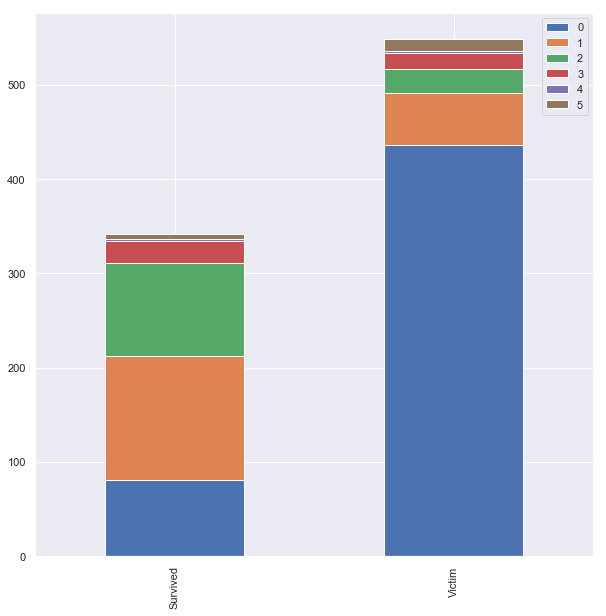

In [24]:
bar_chart('Title')

if you were male, your chances were really low for surviving

if you were a unmarried female your chances were good for survival

married women had a better chance of survival most likely coz their husband made sacrifices for their survival

young boys chances of survival were also very low

In [25]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [27]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


# Sex

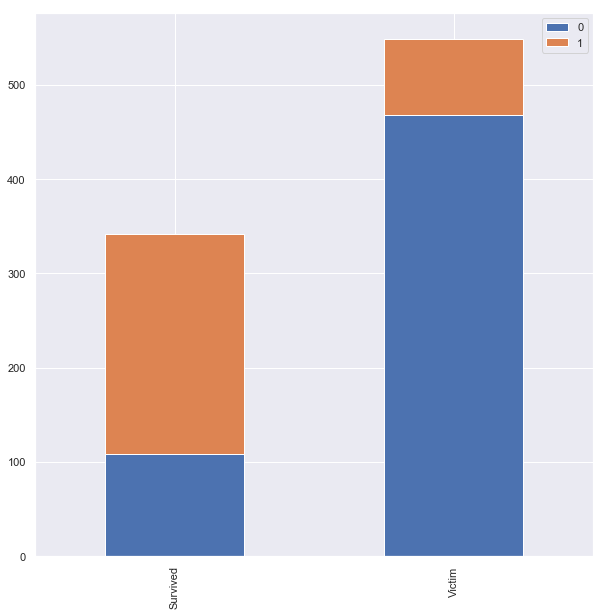

In [28]:
sex_mapping = {"male": 0, "female": 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    
bar_chart('Sex')

this this show again, that women survived in greater numbers than males

# Age

fill in the missing age with median age for each title(mr,miss,mrs,young boys)

In [29]:
train["Age"].fillna(train.groupby('Title')["Age"].transform('median'), inplace=True)
test["Age"].fillna(test.groupby('Title')["Age"].transform('median'), inplace=True)

In [30]:
train.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [32]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


In [35]:
train.groupby('Title')['Age'].transform('median')

0      30.0
1      35.0
2      21.5
3      35.0
4      30.0
5      30.0
6      30.0
7       3.5
8      35.0
9      35.0
10     21.5
11     21.5
12     30.0
13     30.0
14     21.5
15     35.0
16      3.5
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.5
23     30.0
24     21.5
25     35.0
26     30.0
27     30.0
28     21.5
29     30.0
       ... 
861    30.0
862    35.0
863    21.5
864    30.0
865    35.0
866    21.5
867    30.0
868    30.0
869     3.5
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.5
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.5
883    30.0
884    30.0
885    35.0
886    50.0
887    21.5
888    21.5
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [36]:
test.groupby('Title')['Age'].transform('median')

0      28.5
1      36.5
2      28.5
3      28.5
4      36.5
5      28.5
6      22.0
7      28.5
8      36.5
9      28.5
10     28.5
11     28.5
12     36.5
13     28.5
14     36.5
15     36.5
16     28.5
17     28.5
18     22.0
19     36.5
20     28.5
21      7.0
22     36.5
23     28.5
24     36.5
25     28.5
26     22.0
27     28.5
28     28.5
29     28.5
       ... 
388    28.5
389     7.0
390    28.5
391    36.5
392     7.0
393    28.5
394    28.5
395    36.5
396    28.5
397    36.5
398    28.5
399    28.5
400    22.0
401    28.5
402    22.0
403    28.5
404    28.5
405    28.5
406    28.5
407    28.5
408    22.0
409    22.0
410    22.0
411    36.5
412    22.0
413    28.5
414    39.0
415    28.5
416    28.5
417     7.0
Name: Age, Length: 418, dtype: float64

In [37]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


0    549
1    342
Name: Survived, dtype: int64


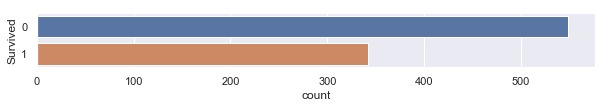

In [38]:
# How many people survived?
fig = plt.figure(figsize=(10,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [39]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <=20), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <=25), 'Age'] = 2,    
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <=30), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <=35), 'Age'] = 4,    
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <=40), 'Age'] = 5,
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <=45), 'Age'] = 6,     
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <=50), 'Age'] = 7,
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <=55), 'Age'] = 8,     
    dataset.loc[(dataset['Age'] > 55) & (dataset['Age'] <=60), 'Age'] = 9,
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 10   

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,5.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,4.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,4.0,0,0,373450,8.0500,NaN,S,0


In [41]:
test.head(30)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,4.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,7.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,10.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,3.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,2.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,0,0.0,0,0,7538,9.2250,NaN,S,0
6,898,3,1,3.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,0,3.0,1,1,248738,29.0000,NaN,S,0
8,900,3,1,1.0,0,0,2657,7.2292,NaN,C,2
9,901,3,0,2.0,2,0,A/4 48871,24.1500,NaN,S,0


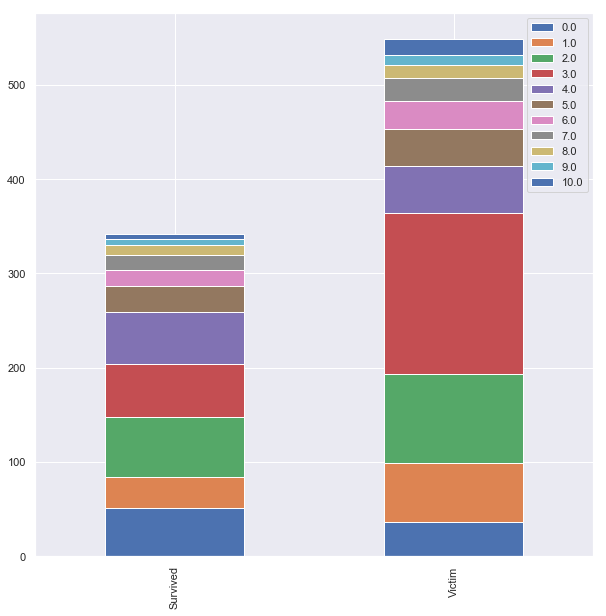

In [42]:
bar_chart('Age')

# Embarked

filling missing values

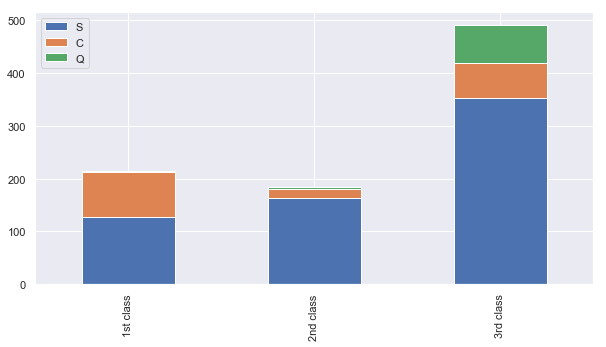

In [43]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [44]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
train.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,5.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,4.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,4.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,3.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,8.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,3.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2


In [45]:
embarked_mapping = {
    "S": 0,
    "C": 1,
    "Q": 2
}

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [46]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [47]:
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,5.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,4.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,4.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,3.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,8.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,3.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


In [48]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [49]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

# Cabin

In [50]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
    

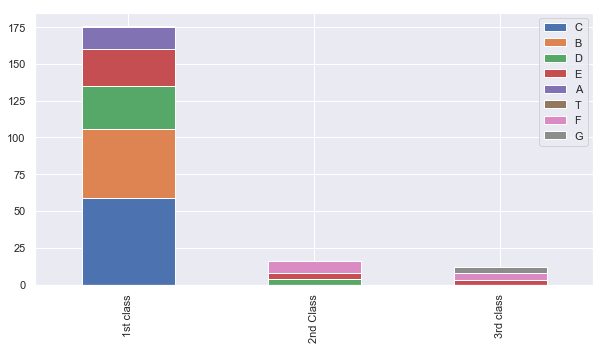

In [51]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd Class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [52]:
cabin_mapping = {
    "A": 0,
    "B": 0.4,
    "C": 0,
    "D": 1.2,
    "E": 1.6,
    "F": 2,
    "G": 2.4,
    "T": 2.8
}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [53]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform("median"), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform("median"), inplace=True)

In [54]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [55]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [56]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1 
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1 

(0, 11.0)

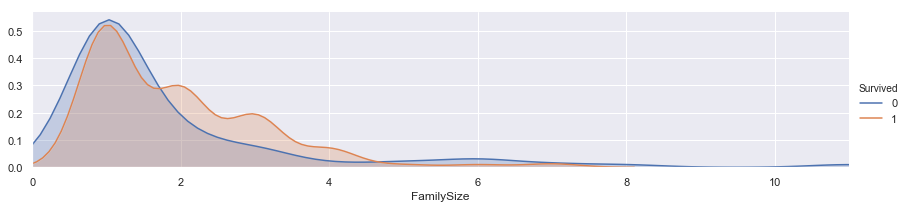

In [57]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,"FamilySize",shade=True)
facet.set(xlim=(0, train["FamilySize"].max()))
facet.add_legend()
plt.xlim(0)

In [58]:
family_mapping = {
    1: 0,
    2: 0.4,   
    3: 0.8,
    4: 1.2,  
    5: 1.6,
    6: 2,   
    7: 2.4,
    8: 2.8,    
    9: 3.2,
    10: 3.6,   
    11: 4
}

for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,2.0,0,0,0.4
1,2,1,1,1,5.0,1,0,PC 17599,71.2833,0.0,1,2,0.4
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,0.0
3,4,1,1,1,4.0,1,0,113803,53.1000,0.0,0,2,0.4
4,5,0,3,0,4.0,0,0,373450,8.0500,2.0,0,0,0.0


In [60]:
feature_drop = ['Ticket', 'SibSp', 'Parch']

train = train.drop(feature_drop, axis=1)
test = test.drop(feature_drop, axis=1)

train = train.drop(['PassengerId'], axis=1)

In [61]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [62]:
train_data.shape, target.shape

((891, 8), (891,))

In [63]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,7.2500,2.0,0,0,0.4
1,1,1,5.0,71.2833,0.0,1,2,0.4
2,3,1,3.0,7.9250,2.0,0,1,0.0
3,1,1,4.0,53.1000,0.0,0,2,0.4
4,3,0,4.0,8.0500,2.0,0,0,0.0
5,3,0,3.0,8.4583,2.0,2,0,0.0
6,1,0,8.0,51.8625,1.6,0,0,0.0
7,3,0,0.0,21.0750,2.0,0,3,1.6
8,3,1,3.0,11.1333,2.0,0,2,0.8
9,2,1,0.0,30.0708,1.8,1,2,0.4


In [64]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(round(np.mean(score)*100,2))


c:\users\lieze\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\lieze\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\lieze\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

77.78


c:\users\lieze\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\lieze\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\lieze\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

In [65]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(round(np.mean(score)*100,2))

73.06


In [66]:

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(round(np.mean(score)*100,2))

78.12


In [67]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(round(np.mean(score)*100,2))

77.21


In [68]:
clf = GaussianNB()
clf.fit(train_data,target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [69]:
submission = pd.DataFrame({
    'PassengerId': test["PassengerId"],
    "Survived": prediction
})

submission.to_csv('submission.csv', index=False)

In [70]:
submission= pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
